In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')


In [2]:
# 데이터 불러오기
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# 데이터 샘플 확인
train_df.head()


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,F,1.5250,1.2375,0.4125,32.630274,12.743100,6.577084,10.446791,10.0
1,1,M,1.8625,1.4250,0.5125,62.397250,28.335325,10.872033,18.852418,16.0
2,2,F,1.5500,1.2500,0.3875,31.808139,11.495722,7.271647,9.355335,14.0
3,3,M,1.4375,1.1125,0.3375,28.066005,13.877080,6.194366,7.796112,9.0
4,4,I,1.2875,1.0250,0.3000,15.748147,6.137667,3.472814,4.677668,8.0


In [3]:
test_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,15000,F,1.5375,1.2125,0.4000,31.623867,13.239216,6.789705,9.922325
1,15001,I,0.9625,0.7375,0.2125,8.901743,4.379998,1.871067,2.409708
2,15002,I,0.9500,0.7000,0.2500,6.888928,2.409708,1.729319,2.126212
3,15003,I,0.6000,0.4375,0.1375,1.828543,0.978058,0.396893,0.566990
4,15004,I,1.1625,0.9125,0.2750,13.239216,6.562909,2.962523,3.486988


In [4]:
train_df.shape

(15000, 10)

In [5]:
test_df.shape

(10000, 9)

In [6]:
train_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [7]:
test_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15000 non-null  int64  
 1   Sex             15000 non-null  object 
 2   Length          15000 non-null  float64
 3   Diameter        15000 non-null  float64
 4   Height          15000 non-null  float64
 5   Weight          15000 non-null  float64
 6   Shucked Weight  15000 non-null  float64
 7   Viscera Weight  15000 non-null  float64
 8   Shell Weight    15000 non-null  float64
 9   Age             15000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   Sex             10000 non-null  object 
 2   Length          10000 non-null  float64
 3   Diameter        10000 non-null  float64
 4   Height          10000 non-null  float64
 5   Weight          10000 non-null  float64
 6   Shucked Weight  10000 non-null  float64
 7   Viscera Weight  10000 non-null  float64
 8   Shell Weight    10000 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 703.3+ KB


In [10]:
train_df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.316742,1.023813,0.347326,23.372701,10.104499,5.040622,6.704216,9.966800
std,4330.271354,0.287869,0.237697,0.091335,12.754705,5.691158,2.805236,3.598253,3.238065
min,0.000000,0.187500,0.150000,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,3749.750000,1.150000,0.887500,0.287500,13.377420,5.698250,2.820775,3.827183,8.000000
50%,7499.500000,1.375000,1.075000,0.362500,23.657658,9.879801,4.904464,6.803880,10.000000
75%,11249.250000,1.537500,1.200000,0.412500,32.205032,14.033003,7.002326,9.071840,11.000000
max,14999.000000,1.950000,1.575000,0.700000,80.101512,48.477645,19.220961,24.564842,29.000000


In [11]:
train_df.describe(include='object')

,Sex
count,15000
unique,3
top,M
freq,5487


In [14]:
# IQR 방식으로 이상치 탐지 함수 정의
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# 모든 수치형 컬럼에 대해 이상치 탐지
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()
outliers = {col: detect_outliers(train_df, col).shape[0] for col in numeric_columns}

# 이상치 비율 계산
outlier_ratio = {col: outliers[col] / train_df.shape[0] for col in numeric_columns}

# 이상치 개수 및 비율 확인
outliers, outlier_ratio


({'id': 0,
  'Sex': 0,
  'Length': 255,
  'Diameter': 262,
  'Height': 68,
  'Weight': 58,
  'Shucked Weight': 91,
  'Viscera Weight': 69,
  'Shell Weight': 92,
  'Age': 991},
 {'id': 0.0,
  'Sex': 0.0,
  'Length': 0.017,
  'Diameter': 0.017466666666666665,
  'Height': 0.004533333333333334,
  'Weight': 0.0038666666666666667,
  'Shucked Weight': 0.006066666666666666,
  'Viscera Weight': 0.0046,
  'Shell Weight': 0.0061333333333333335,
  'Age': 0.06606666666666666})

In [16]:
from sklearn.preprocessing import LabelEncoder

# 성별(Sex) 컬럼 Label Encoding
sex_encoder = LabelEncoder()
train_df["Sex"] = sex_encoder.fit_transform(train_df["Sex"])
test_df["Sex"] = sex_encoder.transform(test_df["Sex"])

# 새로운 Feature 생성
train_df["Volume"] = train_df["Length"] * train_df["Diameter"] * train_df["Height"]
test_df["Volume"] = test_df["Length"] * test_df["Diameter"] * test_df["Height"]

train_df["Density"] = train_df["Weight"] / train_df["Volume"]
test_df["Density"] = test_df["Weight"] / test_df["Volume"]

train_df["Shell Ratio"] = train_df["Shell Weight"] / train_df["Weight"]
test_df["Shell Ratio"] = test_df["Shell Weight"] / test_df["Weight"]

# 이상치 처리: Age 이상치 제거 (IQR 범위 밖 데이터 제거)
Q1, Q3 = train_df["Age"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_df = train_df[(train_df["Age"] >= lower_bound) & (train_df["Age"] <= upper_bound)]

# 최종 데이터 크기 확인
train_df.shape, test_df.shape


((14009, 13), (10000, 12))

In [17]:
X = train_df.drop(columns=["id"])

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# 예제: "Sex" 컬럼이 'F', 'M' 같은 값이라면 변환
train_df["Sex"] = label_encoder.fit_transform(train_df["Sex"])
test_df["Sex"] = label_encoder.transform(test_df["Sex"])  # 테스트 데이터도 동일하게 변환


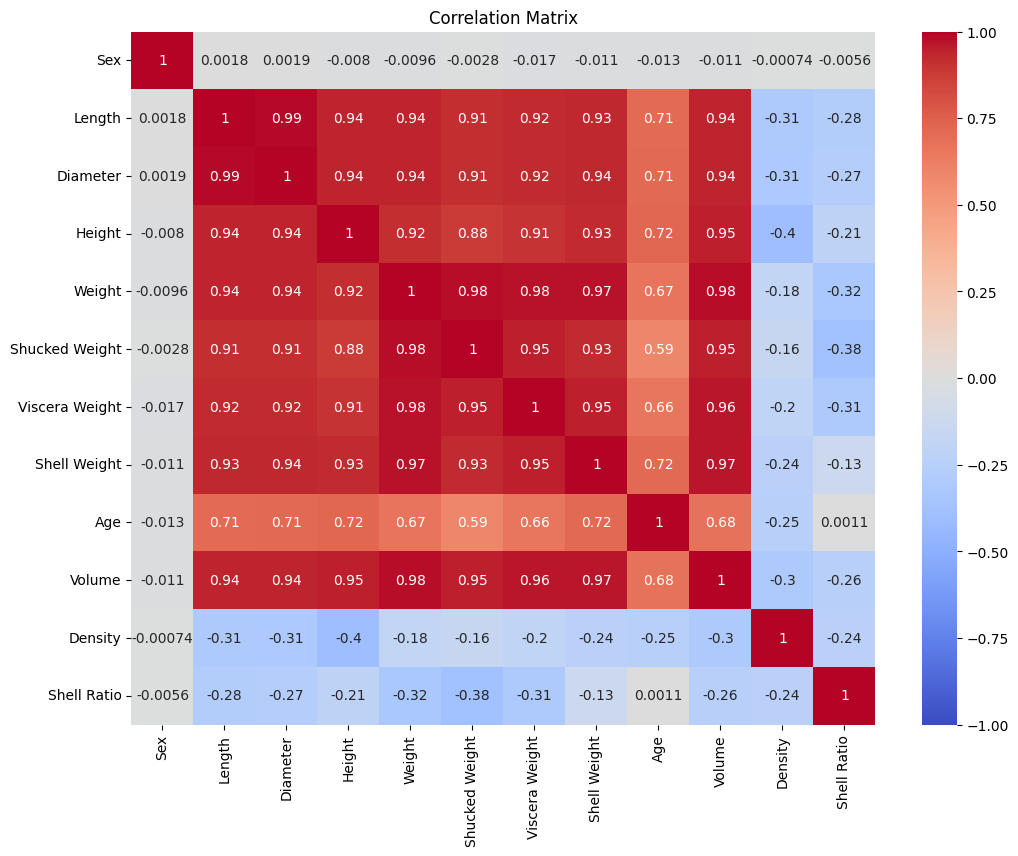

In [19]:
df = pd.DataFrame(X)

# 상관 계수 계산
correlation_matrix = df.corr()

# 상관 계수 히트맵 시각화
plt.figure(figsize=(12,9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, center=0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# 'id' 컬럼 제거, 'Age'는 y로 분리
X = train_df.drop(columns=["id", "Age"])
y = train_df["Age"]
X_test = test_df.drop(columns=["id"])


In [21]:
X

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Volume,Density,Shell Ratio
0,0,1.5250,1.2375,0.4125,32.630274,12.743100,6.577084,10.446791,0.778465,41.916183,0.320156
2,0,1.5500,1.2500,0.3875,31.808139,11.495722,7.271647,9.355335,0.750781,42.366720,0.294118
3,2,1.4375,1.1125,0.3375,28.066005,13.877080,6.194366,7.796112,0.539736,51.999474,0.277778
4,1,1.2875,1.0250,0.3000,15.748147,6.137667,3.472814,4.677668,0.395906,39.777466,0.297030
5,2,1.6250,1.2125,0.3750,41.758814,19.717077,8.575724,10.007373,0.738867,56.517347,0.239647
...,...,...,...,...,...,...,...,...,...,...,...
14995,2,1.3625,1.0750,0.4500,23.388337,12.388732,5.811648,5.386405,0.659109,35.484759,0.230303
14996,2,1.5125,1.1625,0.4125,28.094355,12.048538,6.378637,9.780577,0.725291,38.735285,0.348133
14997,2,1.6125,1.2875,0.4000,37.109496,15.762322,7.342521,11.623295,0.830438,44.686681,0.313216
14998,0,1.4625,1.1250,0.4250,28.916490,10.560189,6.803880,8.646598,0.699258,41.353117,0.299020


In [22]:
y

,Age
0,10.0
2,14.0
3,9.0
4,8.0
5,8.0
...,...
14995,10.0
14996,10.0
14997,13.0
14998,12.0


In [23]:
X_test

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Volume,Density,Shell Ratio
0,0,1.5375,1.2125,0.4000,31.623867,13.239216,6.789705,9.922325,0.745688,42.409008,0.313761
1,1,0.9625,0.7375,0.2125,8.901743,4.379998,1.871067,2.409708,0.150842,59.013769,0.270701
2,1,0.9500,0.7000,0.2500,6.888928,2.409708,1.729319,2.126212,0.166250,41.437164,0.308642
3,1,0.6000,0.4375,0.1375,1.828543,0.978058,0.396893,0.566990,0.036094,50.660925,0.310078
4,1,1.1625,0.9125,0.2750,13.239216,6.562909,2.962523,3.486988,0.291715,45.384103,0.263383
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1.0000,0.7500,0.2500,8.589899,3.515338,1.729319,2.551455,0.187500,45.812792,0.297030
9996,1,0.9500,0.6875,0.2375,6.307764,2.636503,1.389126,2.182911,0.155117,40.664506,0.346067
9997,0,1.4000,1.0875,0.3500,26.251637,11.353975,4.890289,6.733006,0.532875,49.264156,0.256479
9998,0,1.5500,1.2000,0.4250,33.537458,17.434942,6.676307,7.654365,0.790500,42.425627,0.228233


In [24]:
print(train_df.isnull().sum())  # 각 컬럼별 NaN 개수 확인
print(test_df.isnull().sum())   # 테스트 데이터도 확인


id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
Volume            0
Density           0
Shell Ratio       0
dtype: int64
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Volume            0
Density           0
Shell Ratio       0
dtype: int64


In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. NaN 값 확인 및 처리
X.fillna(X.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# 2. 무한대(inf) 값이 있는 경우 처리
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# 다시 NaN 값이 생길 경우, 중앙값으로 대체
X.fillna(X.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# 3. 너무 큰 값(이상치) 처리 (5% ~ 95% 범위로 제한)
lower, upper = X.quantile(0.05), X.quantile(0.95)
X = X.clip(lower, upper, axis=1)

lower_test, upper_test = X_test.quantile(0.05), X_test.quantile(0.95)
X_test = X_test.clip(lower_test, upper_test, axis=1)

# 4. StandardScaler 적용 (평균 0, 표준편차 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

X_scaled.shape, X_test_scaled.shape

((14009, 11), (10000, 11))

In [28]:
from sklearn.model_selection import train_test_split

# 학습 데이터 (80%) & 검증 데이터 (20%) 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
print(X_val.shape, y_val.shape)  # 정상적으로 분할되었는지 확인


(2802, 11) (2802,)


In [30]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 검증 데이터 예측
y_valid_pred = model.predict(X_val)

# 성능 평가 (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, y_valid_pred)
print(f"Linear Regression MAE: {mae}")

Linear Regression MAE: 1.1312705546691841


In [31]:

y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(0, y_test_pred)


In [32]:
from xgboost import XGBRegressor

# XGBoost 회귀 모델 학습
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=7, random_state=42)
xgb_model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred_xgb = xgb_model.predict(X_val)

# 성능 평가 (MAE)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")


XGBoost MAE: 1.10129376601356


In [33]:
# 테스트 데이터 예측
test_predictions = xgb_model.predict(X_test)

# 제출 파일 생성
submission = pd.DataFrame({"id": test_df["id"], "Age": test_predictions})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")


Submission file saved as submission.csv
